In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [9]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()
X_train.shape,y_train.shape

4423680/4422102 [==============================] - 1s 0us/step


((60000, 28, 28), (60000,))

In [10]:
#data normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
#convolution expects a 3D tensor
#it should h x w x c
#MNIST is a grey scale image
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)
X_train.shape

(60000, 28, 28, 1)

In [16]:
#no of classes
K = len(set(y_train))
print(f"number of classes {K}")

number of classes 10


In [20]:
i = Input(shape = X_train[0].shape)
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x= Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)

In [23]:
model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656

In [24]:
model.compile(optimizer='adam',
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [25]:
hist = model.fit(X_train, y_train,
                validation_data=(X_test,y_test),
                epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 38s 633us/sample - loss: 0.5128 - accuracy: 0.8108 - val_loss: 0.3855 - val_accuracy: 0.8541
Epoch 2/15
60000/60000 [==============================] - 34s 568us/sample - loss: 0.3511 - accuracy: 0.8671 - val_loss: 0.3575 - val_accuracy: 0.8687
Epoch 3/15
60000/60000 [==============================] - 34s 569us/sample - loss: 0.3067 - accuracy: 0.8845 - val_loss: 0.3192 - val_accuracy: 0.8807
Epoch 4/15
60000/60000 [==============================] - 35s 581us/sample - loss: 0.2729 - accuracy: 0.8978 - val_loss: 0.2974 - val_accuracy: 0.8932
Epoch 5/15
60000/60000 [==============================] - 35s 584us/sample - loss: 0.2484 - accuracy: 0.9069 - val_loss: 0.3015 - val_accuracy: 0.8921
Epoch 6/15
60000/60000 [==============================] - 35s 587us/sample - loss: 0.2268 - accuracy: 0.9137 - val_loss: 0.2795 - val_accuracy: 0.9005
Epoch 7/15
60000/60000 [====================

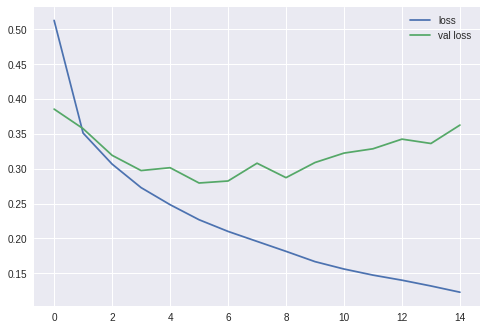

In [27]:
plt.style.use('seaborn')
plt.plot(hist.history['loss'], label="loss")
plt.plot(hist.history['val_loss'], label="val loss")
plt.legend()
plt.show()

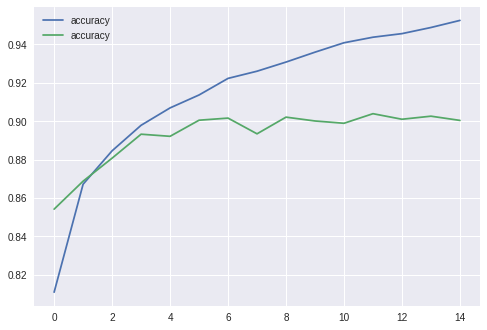

In [28]:
plt.style.use('seaborn')
plt.plot(hist.history['accuracy'], label="accuracy")
plt.plot(hist.history['val_accuracy'], label="accuracy")
plt.legend()
plt.show()

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [37]:
y_pred = model.predict(X_test).argmax(axis=1)

In [46]:
cm = confusion_matrix(y_test,y_pred)

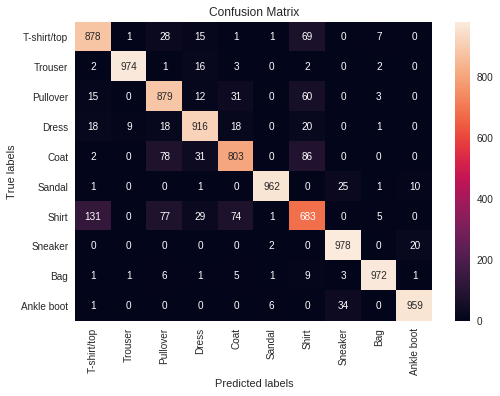

In [58]:
ax= plt.subplot()
sns.heatmap(cm, annot=True,fmt="d", ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels,rotation=90); ax.yaxis.set_ticklabels(labels,rotation=0);

In [44]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

In [ ]:
misclassifier_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassifier_idx)
plt.imshow(X_test[i].reshape(28,28), cmpa='gray')
plt.title(f"True Label :{labels[y_test[i]]}\nPredicted Label : {labels[y_pred[i]}")